In [1]:
import seaborn as sns
import numpy as np
sns.set_theme(style="white")

import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

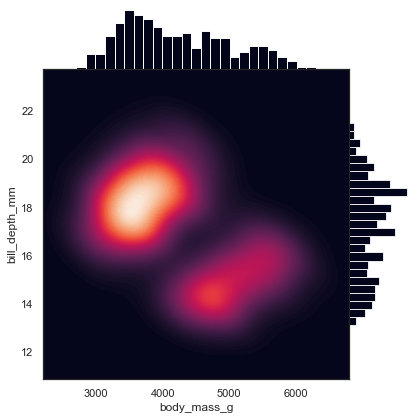

In [1]:
df = sns.load_dataset("penguins")

g = sns.JointGrid(data=df, x="body_mass_g", y="bill_depth_mm", space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((2200, 6800), (10, 25)),
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

In [49]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_idx,island_idx,sex_idx
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,2,2,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,2,2,2
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,2,2,2
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2,2,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,2,2,2


In [48]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_idx,island_idx,sex_idx
count,342.000000,342.000000,342.000000,342.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,1.639535,1.511628,1.511628
std,5.459584,1.974793,14.061714,801.954536,0.480835,0.500593,0.500593
min,32.100000,13.100000,172.000000,2700.000000,1.000000,1.000000,1.000000
25%,39.225000,15.600000,190.000000,3550.000000,1.000000,1.000000,1.000000
50%,44.450000,17.300000,197.000000,4050.000000,2.000000,2.000000,2.000000
75%,48.500000,18.700000,213.000000,4750.000000,2.000000,2.000000,2.000000
max,59.600000,21.500000,231.000000,6300.000000,2.000000,2.000000,2.000000


In [93]:
df.body_mass_g.mode()

0    3800.0
dtype: float64

In [54]:
df[['species', 'island']].value_counts()

species    island   
Gentoo     Biscoe       124
Chinstrap  Dream         68
Adelie     Dream         56
           Torgersen     52
           Biscoe        44
dtype: int64

/opt/homebrew/Caskroom/miniforge/base/envs/py3c/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


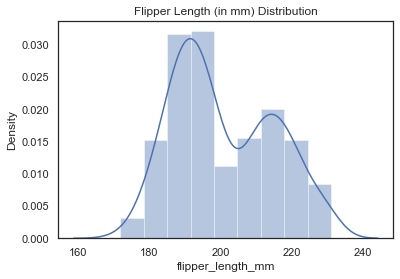

In [94]:
sns.distplot(df.flipper_length_mm).set_title('Flipper Length (in mm) Distribution')
plt.savefig('penguin_flipper_length.png')

In [4]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


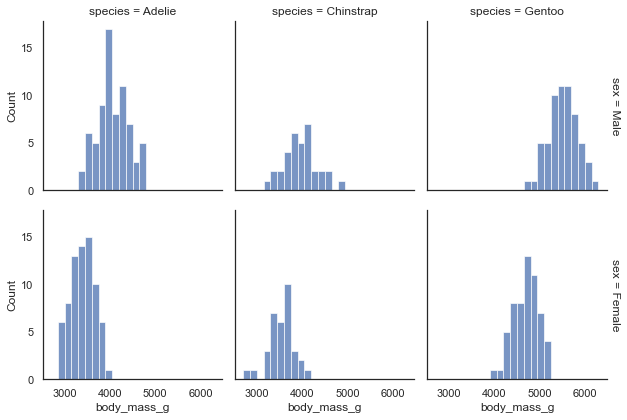

In [57]:

sns.displot(
    df, x="body_mass_g", col="species", row="sex",
    binwidth=150, height=3, facet_kws=dict(margin_titles=True),
)

plt.savefig('penguin_body_mass_cat.png')

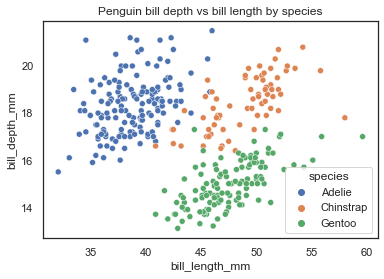

In [58]:
sns.scatterplot(x=df.bill_length_mm, y=df.bill_depth_mm, hue=df.species).set_title('Penguin bill depth vs bill length by species')
plt.savefig('penguin_bill_scatter_cat.png')

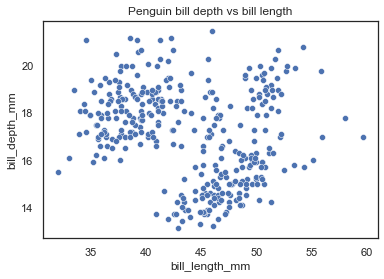

In [59]:
sns.scatterplot(x=df.bill_length_mm, y=df.bill_depth_mm).set_title('Penguin bill depth vs bill length')
plt.savefig('penguin_bill_scatter.png')

In [14]:
df['species_idx'] = np.where(df.species == 'Gentoo', 1, 2)
df['island_idx'] =  np.where(df.island == 'Biscoe', 1, 2)
df['sex_idx'] = np.where(df.sex == 'Male', 1, 2)

/var/folders/1g/m94m5dtd2fq85l8yrv41ksp00000gn/T/ipykernel_8691/2541589411.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd.dropna(inplace=True)


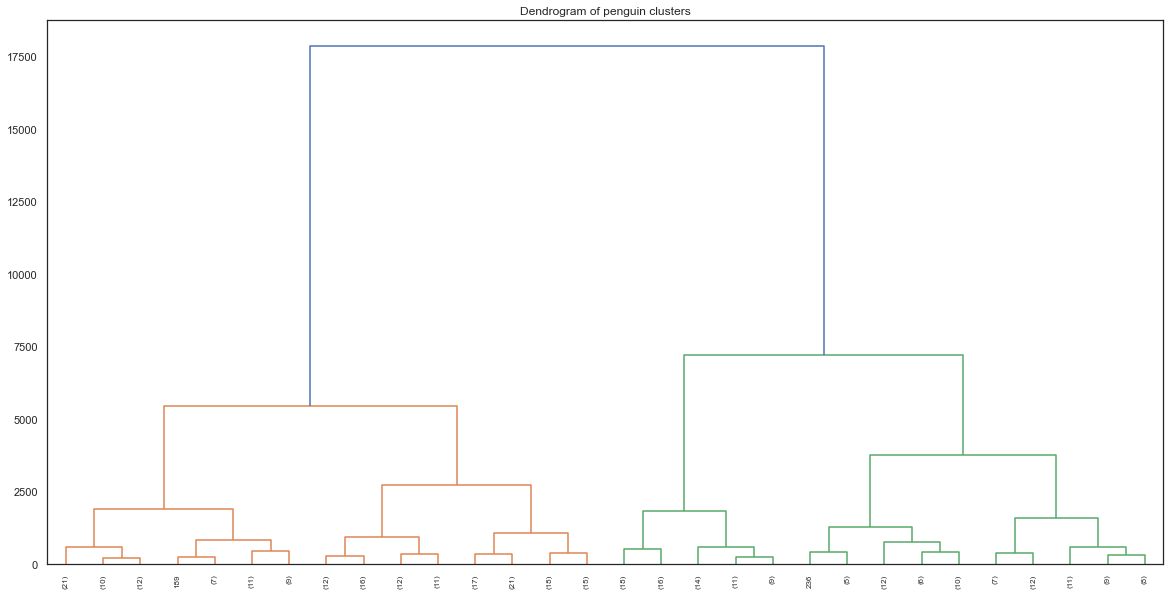

In [60]:
plt.figure(figsize=(20,10))
plt.title('Dendrogram of penguin clusters')
dfd = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g','sex_idx', 'species_idx', 'island_idx']]
dfd.dropna(inplace=True)

dend = shc.dendrogram(shc.linkage(dfd, method='ward'),
                     leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., truncate_mode='lastp')
plt.savefig('penguin_dendrogram.png')

In [17]:
df.value_counts()

species  island     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex   
Gentoo   Biscoe     59.6            17.0           230.0              6050.0       Male      1
Adelie   Torgersen  35.1            19.4           193.0              4200.0       Male      1
                    35.5            17.5           190.0              3700.0       Female    1
                    35.7            17.0           189.0              3350.0       Female    1
                    35.9            16.6           190.0              3050.0       Female    1
                                                                                            ..
Gentoo   Biscoe     43.3            13.4           209.0              4400.0       Female    1
                                    14.0           208.0              4575.0       Female    1
                    43.4            14.4           218.0              4600.0       Female    1
                    43.5            14.2           220.

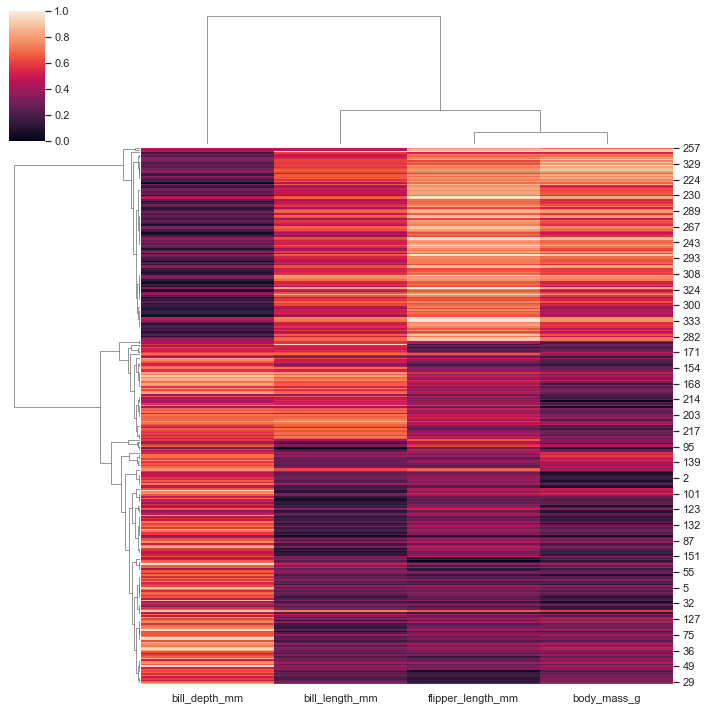

In [90]:
sns.clustermap(dfd[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']], metric="correlation", standard_scale=1)
plt.savefig('penguin_clustermap.png')

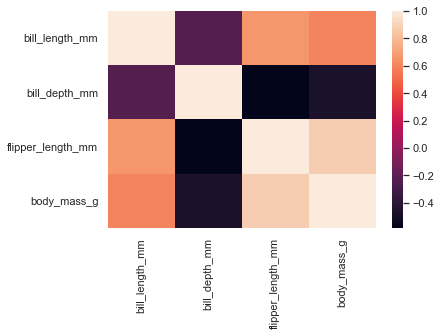

In [88]:
sns.heatmap(df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr())
plt.savefig('penguin_correlation.png')

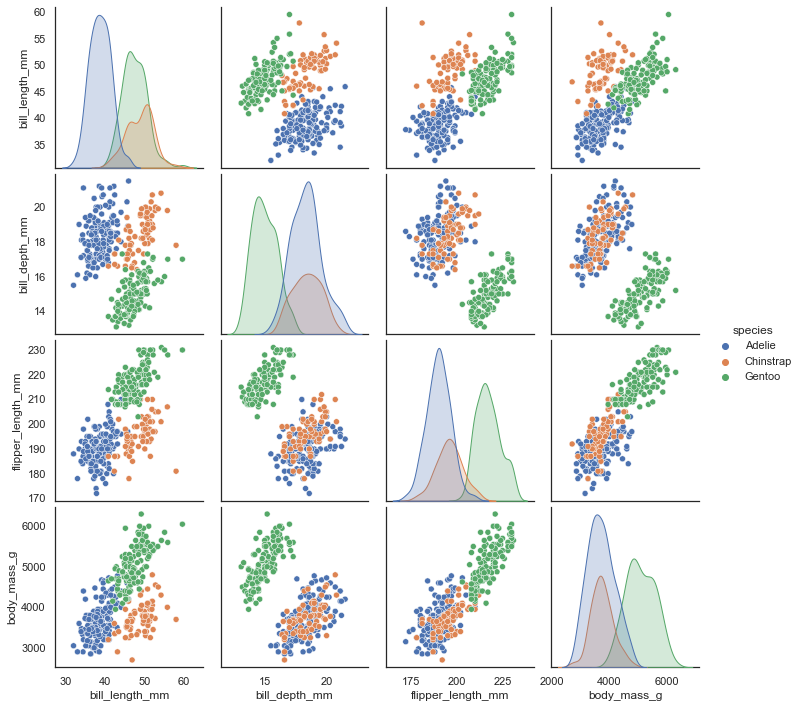

In [89]:
sns.pairplot(df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species']], hue="species")
plt.savefig('penguin_pairplot.png')

In [62]:
dfi = sns.load_dataset("iris")

In [63]:
dfi.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [64]:
dfi.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [65]:
dfi.groupby('species').describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [69]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_idx,island_idx,sex_idx
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,2,2,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,2,2,2
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,2,2,2
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2,2,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,2,2,2
...,...,...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,1,1,2
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,1,1,2
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,1,1,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,1,1,2


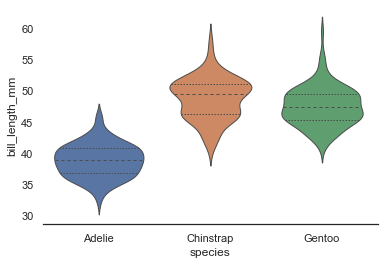

In [76]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=df[df.sex.notnull()], x="species", y="bill_length_mm", 
               split=True, inner="quart", linewidth=1,)
sns.despine(left=True)
plt.savefig('penguin_violinplot.png')

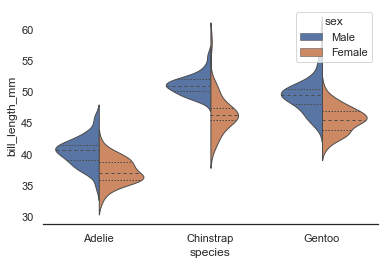

In [78]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=df[df.sex.notnull()], x="species", y="bill_length_mm", hue='sex',
               split=True, inner="quart", linewidth=1,)
sns.despine(left=True)
plt.savefig('penguin_violinplot_sex.png')

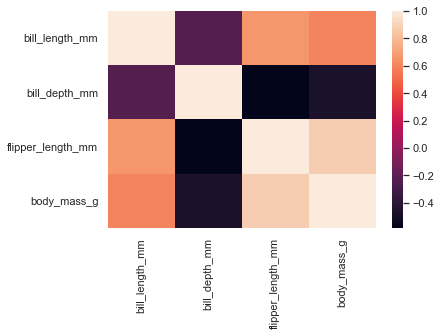

<AxesSubplot:>

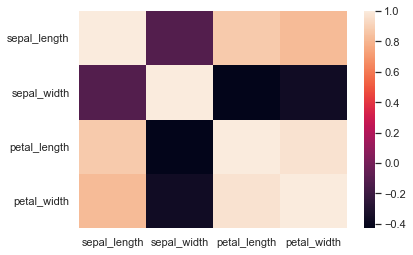

In [80]:
sns.heatmap(dfi.corr())